In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [2]:
def logistic(val):
    return 1/(1+math.exp(-val))

In [3]:
logistic(-500)

7.124576406741285e-218

In [4]:
x = np.linspace(-10,10,1000)

In [5]:
x[:10]

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982])

In [6]:
y = [logistic(val) for val in x]

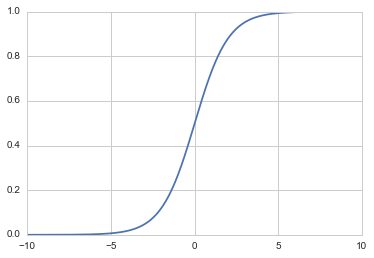

In [7]:
plt.plot(x,y)

-----------
### Part 3: Dataset Analysis
Let us go ahead and take a look at the [dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html)

The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:

[Fair, Ray. 1978. “A Theory of Extramarital Affairs,” `Journal of Political Economy`, February, 45-61.](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf)

It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.

We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.

In [8]:
df = sm.datasets.fair.load_pandas().data

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [10]:
df['affairs']>0

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
6336    False
6337    False
6338    False
6339    False
6340    False
6341    False
6342    False
6343    False
6344    False
6345    False
6346    False
6347    False
6348    False
6349    False
6350    False
6351    False
6352    False
6353    False
6354    False
6355    False
6356    False
6357    False
6358    False
6359    False
6360    False
6361    False
6362    False
6363    False
6364    False
6365    False
Name: affairs, dtype: bool

In [11]:
df['label'] = np.where(df['affairs']>0,1,0)

In [12]:
np.sum(df['label'])

2053

In [13]:
len(df)

6366

In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,label
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [15]:
df.drop('label',axis = 1,inplace=True)

In [16]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [17]:
df['Had_Affair'] = df['affairs'].apply(lambda rec: 1 if rec >0 else 0)

In [18]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [19]:
np.sum(df['Had_Affair'])

2053

In [20]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


C:\Users\Varun\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


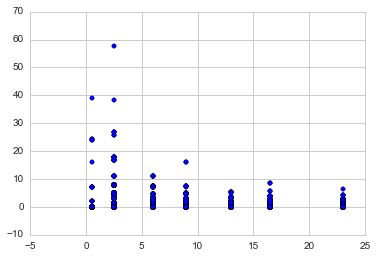

In [21]:
plt.scatter(df['yrs_married'],df['affairs'])

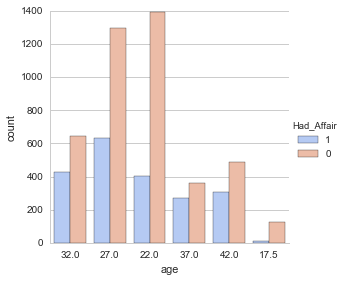

In [22]:
sns.factorplot('age',data=df,hue='Had_Affair',palette = 'coolwarm',kind = 'count')

C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


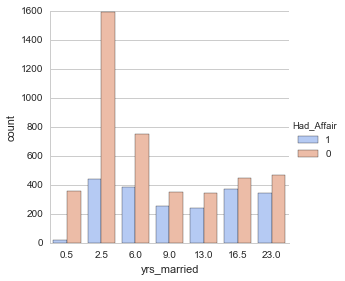

In [27]:
order1 = sorted(np.unique(df['yrs_married']))


sns.factorplot('yrs_married',data=df,kind = 'count',palette = 'coolwarm',hue = 'Had_Affair',x_order = order)

In [26]:
order = sorted(np.unique(df['yrs_married']))
order

[0.5, 2.5, 6.0, 9.0, 13.0, 16.5, 23.0]

C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


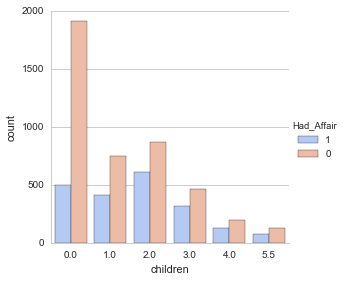

In [28]:
sns.factorplot('children',data=df,kind = 'count',palette = 'coolwarm',hue = 'Had_Affair',x_order = sorted(np.unique(df['children'])))

C:\Users\Varun\Anaconda3\lib\site-packages\seaborn\categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


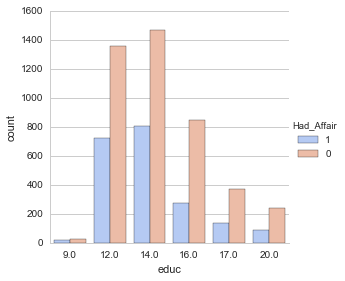

In [29]:
sns.factorplot('educ',data=df,kind = 'count',palette = 'coolwarm',hue = 'Had_Affair',x_order = sorted(np.unique(df['educ'])))